In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import metrics, preprocessing, svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 1- Importing Dataset

In [2]:
df = pd.read_csv("F:\\tutorials\machine learning\machine_learning_with_python_jadi-main\cell_samples.csv")

In [3]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [5]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

# 2- Cleaning Data

## 2-1- Handling Missing Data

In [6]:
df = df[pd.to_numeric(df["BareNuc"], errors="coerce").notnull()]
df = df.astype({"BareNuc":'int64'})

# 3-Plotting

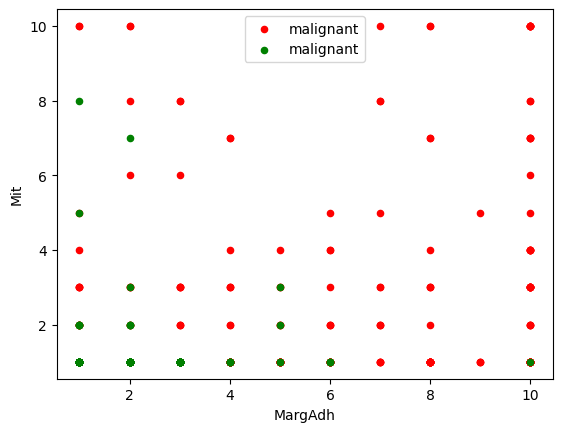

In [7]:
ax = df[df["Class"]==4].plot(kind="scatter", color="red", x="MargAdh", y="Mit", label="malignant")
df[df["Class"]==2].plot(kind="scatter", color="green", x="MargAdh", y="Mit", label="malignant", ax=ax)
plt.show()

# 4- Defining X(features) and y(label)

In [8]:
X=  df[["Clump","UnifSize","UnifShape","MargAdh","SingEpiSize","BareNuc","BlandChrom","NormNucl","Mit"]]
y = df[["Class"]]

# 5- Normalizing the Data

## 5-1-Before Normalization

In [9]:
X.std()

Clump          2.820761
UnifSize       3.065145
UnifShape      2.988581
MargAdh        2.864562
SingEpiSize    2.223085
BareNuc        3.643857
BlandChrom     2.449697
NormNucl       3.052666
Mit            1.732674
dtype: float64

In [10]:
X.mean()

Clump          4.442167
UnifSize       3.150805
UnifShape      3.215227
MargAdh        2.830161
SingEpiSize    3.234261
BareNuc        3.544656
BlandChrom     3.445095
NormNucl       2.869693
Mit            1.603221
dtype: float64

## 5-2-Normalization

In [11]:
scale = preprocessing.StandardScaler().fit(X)
X = scale.fit_transform(X)

## 5-3-After Normalization

In [12]:
X.std()

1.0

In [13]:
X.mean()

1.8494686468458767e-17

# 6-Train Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 7-Modeling

In [15]:
clf = svm.SVC(kernel="sigmoid")
clf.fit(X_train, y_train.values.ravel()) 

SVC(kernel='sigmoid')

# 8-Predicting Test Set

In [16]:
y_pred = clf.predict(X_test)

In [17]:
y_pred

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2,
       2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2], dtype=int64)

# 9-Confusiosn Matrix

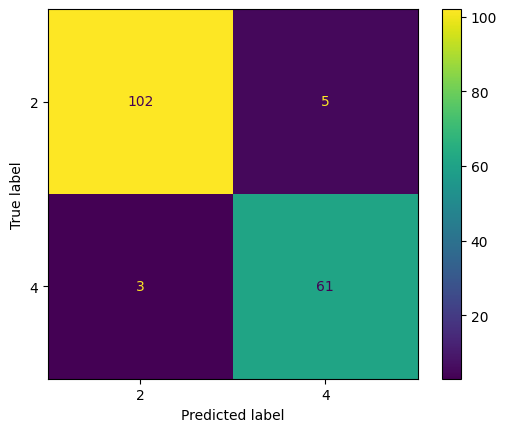

In [18]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [2, 4])
cm_display.plot()
plt.show()

# 10-Evaluation

In [19]:
accuracy_score(y_test, y_pred)

0.9532163742690059